Google cloud storage has much more capacity then a local "persistent" disk attached to a google cloud instance. Data stored in GCS is also permanent and can be accessed from any computer. If performing reductions of a very large dataset, it would be better to access the data directly from the cloud. Xarray provides tools for this.

This notebook demonstrates how to read a zarr file stored in the google cloud bucket.

In [1]:
import gcsfs
import xarray as xr

fs = gcsfs.GCSFileSystem(project='vcm-ml')

Here is a list of the data in the bucket 'vcm-ml-data':

In [2]:
fs.ls('/vcm-ml-data')

['vcm-ml-data/.zattrs',
 'vcm-ml-data/.zgroup',
 'vcm-ml-data/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute/',
 'vcm-ml-data/2019-08-02-MaratGlobalSAM/',
 'vcm-ml-data/2019-08-07_from-2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute.zarr/',
 'vcm-ml-data/2019-08-12-james-huff-additional-gfdl-fields.zarr/',
 'vcm-ml-data/dqv/',
 'vcm-ml-data/figures/',
 'vcm-ml-data/project_data/']

Let's load the recent data that James Huff at GFDL sent us

In [3]:
path = '/vcm-ml-data/2019-08-12-james-huff-additional-gfdl-fields.zarr/'
mapping = fs.get_mapper(path)

ds = xr.open_zarr(mapping)
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, grid_xt: 1536, grid_yt: 768, pfull: 79, phalf: 80, time: 4)
Coordinates:
  * grid_xt       (grid_xt) float32 0.1171875 0.3515625 ... 359.64844 359.8828
  * grid_yt       (grid_yt) float32 -89.88281 -89.64844 ... 89.64844 89.88281
  * pfull         (pfull) float32 4.5137978 8.300872 ... 994.3374 998.2764
  * phalf         (phalf) float32 3.0 6.4671593 10.452223 ... 996.5372 1000.0
  * time          (time) object 2016-08-01 03:00:00 ... 2016-08-01 12:00:00
Dimensions without coordinates: bnds
Data variables:
    dp            (time, pfull, grid_yt, grid_xt) float32 dask.array<shape=(4, 79, 768, 1536), chunksize=(1, 79, 256, 256)>
    dz            (time, pfull, grid_yt, grid_xt) float32 dask.array<shape=(4, 79, 768, 1536), chunksize=(1, 79, 256, 256)>
    grid_xt_bnds  (grid_xt, bnds) float32 dask.array<shape=(1536, 2), chunksize=(256, 2)>
    grid_yt_bnds  (grid_yt, bnds) float32 dask.array<shape=(768, 2), chunksize=(256, 2)>
    zs          

It contains the thickness variables. We can directly plot this data in the notebook:

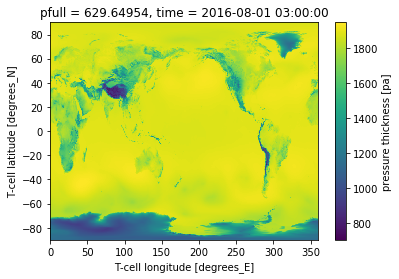

In [4]:
ds.dp[0,50].plot()

Or compute a mean

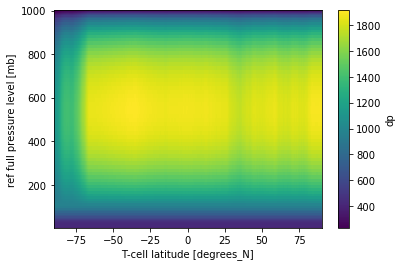

In [5]:
ds.dp.mean(['grid_xt', 'time']).plot()